# Practical session 2
>  - María Castro
>  - Jorge Martín
>  - Miguel Angel Rojas


## Import library

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Functions

In [2]:
#separate train and test train_test_split function' 
def train_test_split_local(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    train_test_split(y, shuffle=False)
    return X_train, X_test, y_train, y_test

def read(file_name, fheader, fuser, ftrial):
    fsadl1 = pd.read_csv(file_name, sep=' ', header=None)
    fdata = fsadl1.iloc[:, :243]
    fdata.columns = fheader
    fdata=fdata[fdata.columns[np.r_[0:45,50:58,63:71,76:84,89:97,102:133]]]
    flabels = fsadl1.iloc[:,243]
    ## Preprocessing data
    #find and remove rows with all nulls
    fidx=fdata.index[fdata.isnull().all(1)] #1 is the axis for rows
    #select data not in idx, that is data that is not all null
    fdata = fdata[~fdata.index.isin(fidx)] 
    #same for labels
    flabels = flabels[~flabels.index.isin(fidx)]

    #see how many there are of each label
    #what does it mean ?
    flabels.value_counts()


    #fill missing values
    fdata = fdata.fillna(method='ffill',axis=1)


    fdata['user'] = fuser
    fdata['trial'] = ftrial
    return fdata, flabels
    
def windowing(fdata, window_number, window_text, porcentage, flabels, frol):
    ffiltered_data = fdata[columns].rolling(frol).median()
    ffiltered_data['MILLISEC'] = fdata.MILLISEC


    # Windowing and Feature Extraction
    ffiltered_data['time']=pd.to_datetime(fdata.MILLISEC,unit='ms')
    ffiltered_data.index=ffiltered_data.time
    #calculate mean over a 1 second window
    keep = ffiltered_data.time.dt.microsecond/window_number %porcentage
    keep = keep - keep.shift() < 0

    means = ffiltered_data[columns].rolling(window_text).mean()[keep]
    means.columns = [str(col) + '_mean' for col in means.columns]
    variances = ffiltered_data[columns].rolling(window_text).var()[keep]
    variances.columns = [str(col) + '_var' for col in variances.columns]

    #talk about apply function
    flabels.index = ffiltered_data.time
    mode_labels = flabels.rolling(window_text).apply(lambda x:mode(x)[0])[keep]

    #all features
    fall_features = pd.concat([means, variances],axis=1)
    fall_features['label'] = mode_labels
    fall_features['user'] = user
    fall_features['trial'] = trial
    
    return fall_features

def plot_confusion_matrix(cm, names, title='MATRIZ DE CONFUSIÓN', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')



## Execises definitions and clasifiers


In [37]:
# def excercise_1 (fall_data, estimators):
#     # Exercise 1
#     # Random train test split

#     # Labels are the values we want to predict
#     labels = np.array(fall_data['label'])

#     # Remove the labels from the features
#     # axis 1 refers to the columns
#     features = fall_data.drop('label', axis = 1)
#     features = features.drop('user', axis = 1)
#     features = features.drop('trial', axis = 1)


#     # Saving feature names for later use
#     feature_list = list(features.columns)

#     # Convert to numpy array
#     features = np.array(features)


#     X_train, X_test, y_train, y_test = train_test_split_local(features, labels)

#     print('X_train:', X_train.shape)
#     print('X_test:', X_test.shape)
#     print('y_train:', y_train.shape)
#     print('y_test:', y_test.shape)


#     classifier = RandomForestClassifier(n_estimators=estimators, random_state=0)  
#     classifier.fit(X_train, y_train)  
#     y_pred = classifier.predict(X_test)
    
#     labels = [0,1,2,4,5]

#     print("\n _______________________________________________________")  
#     print("confusion matrix: \n")  
#     print(confusion_matrix(y_test,y_pred))  
#     print("\n _______________________________________________________")  
#     print("classification report: \n")  
#     print(classification_report(y_test,y_pred))  
#     print("_______________________________________________________")  
#     print("accuracy score: " + str(accuracy_score(y_test, y_pred)))  

    
#     plt.figure(figsize=(15,8))
#     plot_confusion_matrix(confusion_matrix(y_test,y_pred), labels)

# def excercise_2 (fall_data, estimators):
#     # Excercise 2
#     # user 1 2 3 train test 4

#     # Labels are the values we want to predict
#     # Remove the labels from the features
#     # axis 1 refers to the columns

#     user123 = fall_data[fall_data['user'].isin([1, 2, 3])]
#     user4 = fall_data[fall_data['user'].isin([4])]


#     y_train_2 = np.array(user123['label'])
#     y_test_2 = np.array(user4['label'])

#     user123 = user123.drop('label', axis = 1)
#     user123 = user123.drop('user', axis = 1)
#     user123 = user123.drop('trial', axis = 1)

#     user4 = user4.drop('label', axis = 1)
#     user4 = user4.drop('user', axis = 1)
#     user4 = user4.drop('trial', axis = 1)

#     X_train_2 = np.array(user123)
#     X_test_2 = np.array(user4)
#     print('X_train_2:', X_train_2.shape)
#     print('X_test_2:', X_test_2.shape)
#     print('y_train_2:', y_train_2.shape)
#     print('y_test_2:', y_test_2.shape)


#     classifier2 = RandomForestClassifier(n_estimators=estimators, random_state=0)  
#     classifier2.fit(X_train_2, y_train_2)  
#     y_pred_2 = classifier2.predict(X_test_2)

#     print("\n _______________________________________________________")  
#     print("confusion matrix: \n")  
#     print(confusion_matrix(y_test_2,y_pred_2))  
#     print("\n _______________________________________________________")  
#     print("classification report: \n")  
#     print(classification_report(y_test_2,y_pred_2))  
#     print("_______________________________________________________")  
#     print("accuracy score: " +str(accuracy_score(y_test_2, y_pred_2)))

#     labels = [0,1,2,4,5]
#     plt.figure(figsize=(15,8))
#     plot_confusion_matrix(confusion_matrix(y_test_2,y_pred_2), labels)

def excercise_1 (fall_data, estimators):  
    # Excercise 3
    #  1,2,3 and drill session as training data and trials 4 and 5 as test data.

    # Labels are the values we want to predict
    # Remove the labels from the features
    # axis 1 refers to the columns

    trial1236 = fall_data[fall_data['trial'].isin([1, 2, 3, 6])]
    trial45 = fall_data[fall_data['trial'].isin([4, 5])]

    y_train_3 = np.array(trial1236['label'])
    y_test_3 = np.array(trial45['label'])

    trial1236 = trial1236.drop('label', axis = 1)
    trial1236 = trial1236.drop('user', axis = 1)
    trial1236 = trial1236.drop('trial', axis = 1)

    trial45 = trial45.drop('label', axis = 1)
    trial45 = trial45.drop('user', axis = 1)
    trial45 = trial45.drop('trial', axis = 1)

    X_train_3 = np.array(trial1236)
    X_test_3 = np.array(trial45)

    print('X_train_3:', X_train_3.shape)
    print('X_test_3:', X_test_3.shape)
    print('y_train_3:', y_train_3.shape)
    print('y_test_3:', y_test_3.shape)


    classifier = RandomForestClassifier(n_estimators=estimators, random_state=0)  
    classifier.fit(X_train_3, y_train_3)  
    y_pred_3 = classifier.predict(X_test_3)


    print("\n _______________________________________________________")  
    print("confusion matrix: \n")  
    print(confusion_matrix(y_test_3,y_pred_3))  
    print("\n _______________________________________________________")  
    print("classification report: \n")  
    print(classification_report(y_test_3,y_pred_3))  
    print("_______________________________________________________")  
    print("accuracy score: " + str(accuracy_score(y_test_3, y_pred_3)))

    labels = [0,1,2,4,5]
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(confusion_matrix(y_test_3,y_pred_3), labels)

def excercise_2 (fall_data, estimators):  
    # Excercise 3
    #  1,2,3 and drill session as training data and trials 4 and 5 as test data.

    # Labels are the values we want to predict
    # Remove the labels from the features
    # axis 1 refers to the columns

    
    fall_data_RUA = fall_data.filter([
    'InertialMeasurementUnit_RUA_accX_var',
    'InertialMeasurementUnit_RUA_accY_var',
    'InertialMeasurementUnit_RUA_accZ_var',
    'InertialMeasurementUnit_RUA_accX_mean',
    'InertialMeasurementUnit_RUA_accY_mean',
    'InertialMeasurementUnit_RUA_accZ_mean',
    'label',
    'user',
    'trial'
    ], axis=1)

    fall_data_BACK = fall_data.filter([
    'InertialMeasurementUnit_BACK_accX_var',
    'InertialMeasurementUnit_BACK_accY_var',
    'InertialMeasurementUnit_BACK_accZ_var',
    'InertialMeasurementUnit_BACK_accX_mean',
    'InertialMeasurementUnit_BACK_accY_mean',
    'InertialMeasurementUnit_BACK_accZ_mean',
    'label',
    'user',
    'trial'
    ], axis=1)
    
    
    trial1236 = fall_data_BACK[fall_data_BACK['trial'].isin([1, 2, 3, 6])]
    trial45 = fall_data_RUA[fall_data_RUA['trial'].isin([4, 5])]

    y_train_3 = np.array(trial1236['label'])
    y_test_3 = np.array(trial45['label'])

    trial1236 = trial1236.drop('label', axis = 1)
    trial1236 = trial1236.drop('user', axis = 1)
    trial1236 = trial1236.drop('trial', axis = 1)

    trial45 = trial45.drop('label', axis = 1)
    trial45 = trial45.drop('user', axis = 1)
    trial45 = trial45.drop('trial', axis = 1)

    X_train_3 = np.array(trial1236)
    X_test_3 = np.array(trial45)

    print('X_train_3:', X_train_3.shape)
    print('X_test_3:', X_test_3.shape)
    print('y_train_3:', y_train_3.shape)
    print('y_test_3:', y_test_3.shape)


    classifier = RandomForestClassifier(n_estimators=estimators, random_state=0)  
    classifier.fit(X_train_3, y_train_3)  
    y_pred_3 = classifier.predict(X_test_3)


    print("\n _______________________________________________________")  
    print("confusion matrix: \n")  
    print(confusion_matrix(y_test_3,y_pred_3))  
    print("\n _______________________________________________________")  
    print("classification report: \n")  
    print(classification_report(y_test_3,y_pred_3))  
    print("_______________________________________________________")  
    print("accuracy score: " + str(accuracy_score(y_test_3, y_pred_3)))

    labels = [0,1,2,4,5]
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(confusion_matrix(y_test_3,y_pred_3), labels)

## Read data

In [3]:

path = 'dataset/' #enter thepath for the dataset folder
header_path = 'header.csv' #enter the path for the header file
header=pd.read_csv(header_path,names=['column',''])['column'].values
users = range(1,5)
trials = range(1,7)
all_data_1S = pd.DataFrame()
all_data_2S = pd.DataFrame()
all_data_5S = pd.DataFrame()
all_data_10S = pd.DataFrame()

In [4]:
for user in users:
    for trial in trials:
        if trial == 6:
            file_name = path+'S'+str(user)+'-Drill'+'.dat'
        else:
            file_name = path+'S'+str(user)+'-ADL'+str(trial)+'.dat'
        data, labels = read(file_name, header, user, trial)
        columns = data.columns[~data.columns.isin(['user', 'trial','MILLISEC'])]
        #we use a window of 11 elements
        # Filtering using median filter
        
        all_features_1S = windowing(data, 1000, '1S', 500, labels, 11)
        all_data_1S = pd.concat([all_data_1S, all_features_1S])
        
#         all_features_2S = windowing(data, 2000, '2S', 1000, labels, 11)
#         all_data_2S = pd.concat([all_data_2S, all_features_2S])
        
#         all_features_5S = windowing(data, 5000, '5S', 2500, labels, 11)
#         all_data_5S = pd.concat([all_data_5S, all_features_5S])
        
#         all_features_10S = windowing(data, 10000, '10S', 5000, labels, 11)
#         all_data_10S = pd.concat([all_data_10S, all_features_10S])

    

## Exploratory data analysis

In [5]:
data.describe()

,MILLISEC,Accelerometer_RKN^_accX,Accelerometer_RKN^_accY,Accelerometer_RKN^_accZ,Accelerometer_HIP_accX,Accelerometer_HIP_accY,Accelerometer_HIP_accZ,Accelerometer_LUA^_accX,Accelerometer_LUA^_accY,Accelerometer_LUA^_accZ,...,InertialMeasurementUnit_R-SHOE_Body_Ay,InertialMeasurementUnit_R-SHOE_Body_Az,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameX,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameY,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameZ,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameX,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameY,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameZ,user,trial
count,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,...,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.0,45460.0
mean,7.576424e+05,7.205346e+04,7.273918e+04,7.213026e+04,7.473093e+03,8.570559e+03,7.912822e+03,5.460099e+03,5.830548e+03,5.107764e+03,...,527.461615,751.195139,15.213308,72.193445,46.187593,72.193445,-12.695095,46.187593,4.0,6.0
std,4.374395e+05,2.770680e+05,2.768902e+05,2.770482e+05,9.730875e+04,9.722217e+04,9.727437e+04,8.701798e+04,8.699683e+04,8.703878e+04,...,463.129698,421.830454,1651.352297,1028.671603,915.979974,1028.671603,1651.373576,915.979974,0.0,0.0
min,0.000000e+00,-2.240000e+03,-7.560000e+02,-1.907000e+03,-1.002000e+03,-5.700000e+01,-1.456000e+03,-2.500000e+02,-7.990000e+02,-1.076000e+03,...,-4985.000000,-5305.000000,-8661.000000,-13377.000000,-15677.000000,-13377.000000,-13458.000000,-15677.000000,4.0,6.0
25%,3.788215e+05,1.110000e+02,9.100000e+02,6.500000e+01,-3.380000e+02,8.510000e+02,1.390000e+02,3.220000e+02,7.490000e+02,-6.000000e+01,...,390.000000,694.000000,-43.000000,-42.000000,-44.000000,-42.000000,-75.000000,-44.000000,4.0,6.0
50%,7.576425e+05,2.090000e+02,1.010000e+03,2.510000e+02,-1.290000e+02,9.180000e+02,3.390000e+02,4.035000e+02,8.620000e+02,1.630000e+02,...,407.000000,799.000000,3.000000,3.000000,-3.000000,3.000000,-3.000000,-3.000000,4.0,6.0
75%,1.136464e+06,3.680000e+02,1.048000e+03,5.560000e+02,-4.800000e+01,9.710000e+02,4.580000e+02,5.570000e+02,9.380000e+02,2.830000e+02,...,547.000000,809.000000,77.000000,77.000000,46.000000,77.000000,44.000000,46.000000,4.0,6.0
max,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,...,7100.000000,5496.000000,13458.000000,9670.000000,6765.000000,9670.000000,8661.000000,6765.000000,4.0,6.0


In [6]:
all_data_1S.describe()

,Accelerometer_RKN^_accX_mean,Accelerometer_RKN^_accY_mean,Accelerometer_RKN^_accZ_mean,Accelerometer_HIP_accX_mean,Accelerometer_HIP_accY_mean,Accelerometer_HIP_accZ_mean,Accelerometer_LUA^_accX_mean,Accelerometer_LUA^_accY_mean,Accelerometer_LUA^_accZ_mean,Accelerometer_RUA__accX_mean,...,InertialMeasurementUnit_R-SHOE_Body_Az_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameX_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameY_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameZ_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameX_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameY_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameZ_var,label,user,trial
count,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,...,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,5.794800e+04,57948.000000,57948.000000,57948.000000
mean,5.182707e+04,5.257547e+04,5.212710e+04,2.471369e+04,2.577001e+04,2.501423e+04,2.324163e+04,2.387518e+04,2.334596e+04,2.211686e+04,...,1.189349e+08,1.197915e+08,1.190339e+08,1.192513e+08,1.190339e+08,1.197912e+08,1.192513e+08,1.631532,2.422758,3.649185
std,2.294985e+05,2.293525e+05,2.294382e+05,1.768941e+05,1.767483e+05,1.768527e+05,1.732081e+05,1.731242e+05,1.731944e+05,1.672079e+05,...,9.165239e+09,9.159885e+09,9.159879e+09,9.159918e+09,9.159879e+09,9.159843e+09,9.159918e+09,1.377761,1.107749,1.875126
min,-1.039200e+03,-8.791667e+02,-1.195667e+03,-1.022200e+03,-4.091000e+02,-9.939667e+02,-1.023700e+03,-9.754333e+02,-9.754333e+02,-8.278000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,-6.020000e+01,8.710667e+02,1.150667e+02,-3.633083e+02,8.990000e+02,2.666667e-01,1.451667e+01,7.833667e+02,8.225833e+01,1.493667e+02,...,4.047126e+00,1.342057e+02,1.427911e+02,1.101698e+02,1.427911e+02,1.341816e+02,1.101698e+02,1.000000,1.000000,2.000000
50%,3.880000e+01,9.857500e+02,3.286833e+02,-1.553333e+02,9.518000e+02,1.218333e+02,1.741000e+02,9.062167e+02,2.845833e+02,3.750667e+02,...,1.642489e+02,3.713322e+03,4.625671e+03,3.625663e+03,4.625671e+03,3.713322e+03,3.625663e+03,1.000000,2.000000,4.000000
75%,1.710750e+02,1.032133e+03,8.179000e+02,-1.666667e+00,9.870333e+02,2.752333e+02,3.774083e+02,9.624667e+02,4.490083e+02,7.174879e+02,...,6.053934e+03,4.029678e+05,1.715209e+05,3.592538e+05,1.715209e+05,4.029678e+05,3.592538e+05,2.000000,3.000000,6.000000
max,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,2.363360e+06,...,1.412725e+12,1.411983e+12,1.411971e+12,1.411983e+12,1.411971e+12,1.411977e+12,1.411983e+12,5.000000,4.000000,6.000000


In [30]:
all_data_RUA_filtered = all_data_1S.filter([
'InertialMeasurementUnit_RUA_accX_var',
'InertialMeasurementUnit_RUA_accY_var',
'InertialMeasurementUnit_RUA_accZ_var',
'InertialMeasurementUnit_RUA_accX_mean',
'InertialMeasurementUnit_RUA_accY_mean',
'InertialMeasurementUnit_RUA_accZ_mean',
'label',
'user',
'trial'
], axis=1)

all_data_RUA_BACK_filtered = all_data_1S.filter([
'InertialMeasurementUnit_RUA_accX_var',
'InertialMeasurementUnit_RUA_accY_var',
'InertialMeasurementUnit_RUA_accZ_var',
'InertialMeasurementUnit_RUA_accX_mean',
'InertialMeasurementUnit_RUA_accY_mean',
'InertialMeasurementUnit_RUA_accZ_mean',
'InertialMeasurementUnit_BACK_accX_var',
'InertialMeasurementUnit_BACK_accY_var',
'InertialMeasurementUnit_BACK_accZ_var',
'InertialMeasurementUnit_BACK_accX_mean',
'InertialMeasurementUnit_BACK_accY_mean',
'InertialMeasurementUnit_BACK_accZ_mean',
'label',
'user',
'trial'
], axis=1)

# all_data_5S_filtered = all_data_5S.filter(['Accelerometer_RKN^_accY_mean',
# 'Accelerometer_HIP_accY_mean',
# 'Accelerometer_BACK_accY_mean',
# 'InertialMeasurementUnit_BACK_accY_mean',
# 'Accelerometer_RKN^_accY_var',
# 'Accelerometer_HIP_accY_var',
# 'Accelerometer_BACK_accY_var',
# 'InertialMeasurementUnit_BACK_accY_var',
# 'label',
# 'user',
# 'trial'
# ], axis=1)

# all_data_10S_filtered = all_data_10S.filter(['Accelerometer_RKN^_accY_mean',
# 'Accelerometer_HIP_accY_mean',
# 'Accelerometer_BACK_accY_mean',
# 'InertialMeasurementUnit_BACK_accY_mean',
# 'Accelerometer_RKN^_accY_var',
# 'Accelerometer_HIP_accY_var',
# 'Accelerometer_BACK_accY_var',
# 'InertialMeasurementUnit_BACK_accY_var',
# 'label',
# 'user',
# 'trial'
# ], axis=1)

In [31]:
print("\n _______________________________________________________")  
print(all_data_RUA_filtered.head())
print("\n _______________________________________________________")  
print(all_data_RUA_BACK_filtered.head())
print("\n _______________________________________________________")  
# print(all_data_5S_filtered.head())
# print("\n _______________________________________________________")  
# print(all_data_10S_filtered.head())


 _______________________________________________________
                         InertialMeasurementUnit_RUA_accX_var  \
time                                                            
1970-01-01 00:00:00.500                            199.600000   
1970-01-01 00:00:01.000                            368.600000   
1970-01-01 00:00:01.500                            370.488506   
1970-01-01 00:00:02.000                            823.144828   
1970-01-01 00:00:02.500                          22702.506897   

                         InertialMeasurementUnit_RUA_accY_var  \
time                                                            
1970-01-01 00:00:00.500                             55.066667   
1970-01-01 00:00:01.000                            528.347619   
1970-01-01 00:00:01.500                           2349.426437   
1970-01-01 00:00:02.000                           7697.385057   
1970-01-01 00:00:02.500                          97330.685057   

                         Inert

In [33]:
print("\n _______________________________________________________")  
print(all_data_RUA_filtered.label.value_counts())
print("\n _______________________________________________________")  
print(all_data_RUA_BACK_filtered.label.value_counts())
print("\n _______________________________________________________")  
# print(all_data_5S_filtered.label.value_counts())
# print("\n _______________________________________________________")  
# print(all_data_10S_filtered.label.value_counts())


 _______________________________________________________
1.0    23172
2.0    13218
0.0    10747
4.0     9119
5.0     1692
Name: label, dtype: int64

 _______________________________________________________
1.0    23172
2.0    13218
0.0    10747
4.0     9119
5.0     1692
Name: label, dtype: int64

 _______________________________________________________


In [34]:
print("\n _______________________________________________________")  
print(all_data_RUA_filtered.trial.value_counts())
print("\n _______________________________________________________")  
print(all_data_RUA_BACK_filtered.trial.value_counts())
print("\n _______________________________________________________")  
# print(all_data_5S_filtered.trial.value_counts())
# print("\n _______________________________________________________")  
# print(all_data_10S_filtered.trial.value_counts())


 _______________________________________________________
6    14981
1    11513
3     7956
5     7930
2     7863
4     7705
Name: trial, dtype: int64

 _______________________________________________________
6    14981
1    11513
3     7956
5     7930
2     7863
4     7705
Name: trial, dtype: int64

 _______________________________________________________


In [36]:
print("\n _______________________________________________________")  
print(all_data_RUA_filtered.user.value_counts())
print("\n _______________________________________________________")  
print(all_data_RUA_BACK_filtered.user.value_counts())
print("\n _______________________________________________________")  
# print(all_data_5S_filtered.user.value_counts())
# print("\n _______________________________________________________")  
# print(all_data_10S_filtered.user.value_counts())


 _______________________________________________________
1    15641
2    15010
3    14455
4    12842
Name: user, dtype: int64

 _______________________________________________________
1    15641
2    15010
3    14455
4    12842
Name: user, dtype: int64

 _______________________________________________________


In [25]:
# #separate by class, see feature mean
# all_data_1S_0 = all_data_1S_filtered[all_data_1S_filtered.label==0]
# all_data_1S_1 = all_data_1S_filtered[all_data_1S_filtered.label==1]
# all_data_1S_2 = all_data_1S_filtered[all_data_1S_filtered.label==2]
# all_data_1S_4 = all_data_1S_filtered[all_data_1S_filtered.label==4]
# all_data_1S_5 = all_data_1S_filtered[all_data_1S_filtered.label==5]

# draw_col = 10
# sns.distplot(all_data_1S_0.iloc[:,draw_col], hist=False, kde=True, color='red')
# sns.distplot(all_data_1S_1.iloc[:,draw_col], hist=False, kde=True, color='green')
# sns.distplot(all_data_1S_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
# sns.distplot(all_data_1S_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
# sns.distplot(all_data_1S_5.iloc[:,draw_col], hist=False, kde=True, color='black')

In [18]:
# #separate by class, see feature mean
# all_data_2S_0 = all_data_2S_filtered[all_data_2S_filtered.label==0]
# all_data_2S_1 = all_data_2S_filtered[all_data_2S_filtered.label==1]
# all_data_2S_2 = all_data_2S_filtered[all_data_2S_filtered.label==2]
# all_data_2S_4 = all_data_2S_filtered[all_data_2S_filtered.label==4]
# all_data_2S_5 = all_data_2S_filtered[all_data_2S_filtered.label==5]

# draw_col = 10
# sns.distplot(all_data_2S_0.iloc[:,draw_col], hist=False, kde=True, color='red')
# sns.distplot(all_data_2S_1.iloc[:,draw_col], hist=False, kde=True, color='green')
# sns.distplot(all_data_2S_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
# sns.distplot(all_data_2S_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
# sns.distplot(all_data_2S_5.iloc[:,draw_col], hist=False, kde=True, color='black')

In [19]:
# #separate by class, see feature mean
# all_data_5S_0 = all_data_5S_filtered[all_data_5S_filtered.label==0]
# all_data_5S_1 = all_data_5S_filtered[all_data_5S_filtered.label==1]
# all_data_5S_2 = all_data_5S_filtered[all_data_5S_filtered.label==2]
# all_data_5S_4 = all_data_5S_filtered[all_data_5S_filtered.label==4]
# all_data_5S_5 = all_data_5S_filtered[all_data_5S_filtered.label==5]

# draw_col = 10
# sns.distplot(all_data_5S_0.iloc[:,draw_col], hist=False, kde=True, color='red')
# sns.distplot(all_data_5S_1.iloc[:,draw_col], hist=False, kde=True, color='green')
# sns.distplot(all_data_5S_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
# sns.distplot(all_data_5S_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
# sns.distplot(all_data_5S_5.iloc[:,draw_col], hist=False, kde=True, color='black')

In [20]:
# #separate by class, see feature mean
# all_data_10S_0 = all_data_10S_filtered[all_data_10S_filtered.label==0]
# all_data_10S_1 = all_data_10S_filtered[all_data_10S_filtered.label==1]
# all_data_10S_2 = all_data_10S_filtered[all_data_10S_filtered.label==2]
# all_data_10S_4 = all_data_10S_filtered[all_data_10S_filtered.label==4]
# all_data_10S_5 = all_data_10S_filtered[all_data_10S_filtered.label==5]

# draw_col = 10
# sns.distplot(all_data_10S_0.iloc[:,draw_col], hist=False, kde=True, color='red')
# sns.distplot(all_data_10S_1.iloc[:,draw_col], hist=False, kde=True, color='green')
# sns.distplot(all_data_10S_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
# sns.distplot(all_data_10S_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
# sns.distplot(all_data_10S_5.iloc[:,draw_col], hist=False, kde=True, color='black')

## Metrics

In [26]:
# print("#############################")
# excercise_1(all_data_1S_filtered, 50)
# print("#############################")
# excercise_1(all_data_2S_filtered, 50)
# print("#############################")
# excercise_1(all_data_5S_filtered, 50)
# print("#############################")
# excercise_1(all_data_10S_filtered, 50)
# print("#############################")

In [27]:
# print("#############################")
# excercise_2(all_data_1S_filtered, 50)
# print("#############################")
# excercise_2(all_data_2S_filtered, 50)
# print("#############################")
# excercise_2(all_data_5S_filtered, 50)
# print("#############################")
# excercise_2(all_data_10S_filtered, 50)
# print("#############################")



#############################
X_train_3: (42313, 6)
X_test_3: (15635, 6)
y_train_3: (42313,)
y_test_3: (15635,)

 _______________________________________________________
confusion matrix: 

[[1546 1045  877   96   33]
 [ 350 3674  575  377   14]
 [ 222 1292 1941   50    1]
 [  81  572   65 2168   23]
 [  59   22    1   68  483]]

 _______________________________________________________
classification report: 

              precision    recall  f1-score   support

         0.0       0.68      0.43      0.53      3597
         1.0       0.56      0.74      0.63      4990
         2.0       0.56      0.55      0.56      3506
         4.0       0.79      0.75      0.76      2909
         5.0       0.87      0.76      0.81       633

   micro avg       0.63      0.63      0.63     15635
   macro avg       0.69      0.65      0.66     15635
weighted avg       0.64      0.63      0.62     15635

_______________________________________________________
accuracy score: 0.6275663575311801
X_trai

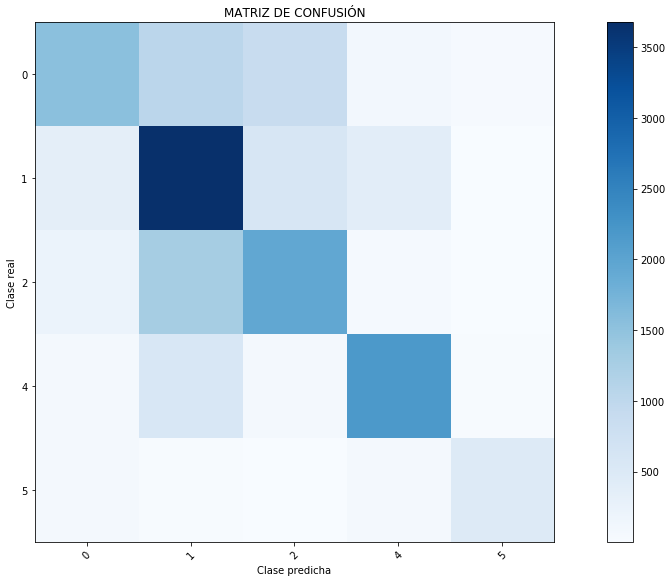

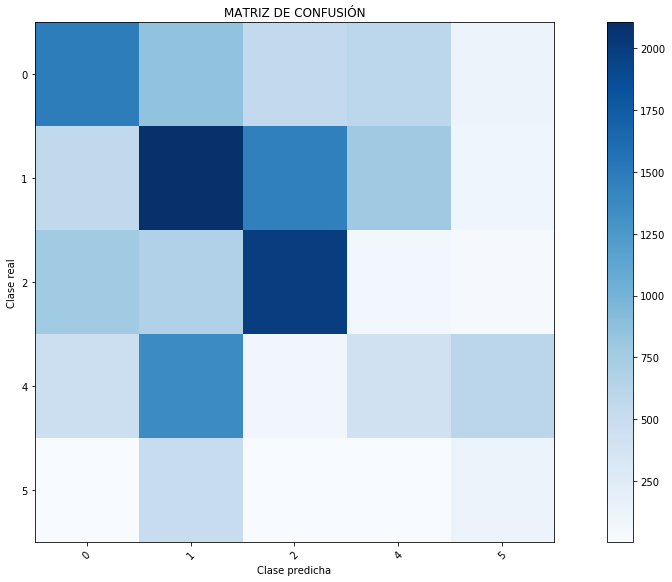

In [38]:
print("#############################")
excercise_1(all_data_RUA_filtered, 50)
excercise_2(all_data_RUA_BACK_filtered, 50)
print("#############################")
# excercise_3(all_data_2S_filtered, 50)
# print("#############################")
# excercise_3(all_data_5S_filtered, 50)
# print("#############################")
# excercise_3(all_data_10S_filtered, 50)
# print("#############################")



# Conclusions:

### According precision and recall metrics, the best answer are with method 1 , where training and test data are taken radomly, by the way the best results appear when the time analyzed is 10 seconds , probably because the activities sequence going the best results over a longer time. 

### Maybe this metric would be reduced if you take more than 10 seconds or as it`s showing in this report you can reduce the effectiveness if you take a litlle less bit time as well.

### If only one place could be selected to put the senssor according to the correlation matrix I would place it on back, which one has a highest level of correlation with other variables (related with acelerometer and innertian) an then this one can give me reliable information , but that would be useful for this analysis. 


### If the smartphone changed it´s orientation , I suposse the answers of this study doesn´t change , because the sensors of the smartphone (accelerometer, gyroscope, magnetometer), can tell you the position of the phone.